In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import json

In [2]:
def plot_line_and_polygon(shape: pd.DataFrame, points: pd.DataFrame = None) -> None:
    fig, ax = plt.subplots(figsize=(9,13))

    if points is not None:
        ax.plot(points.Easting,points.Northing,color='red',markersize=3,label='Observed Data')
        
    ax.plot(shape.Easting,shape.Northing,linestyle='dashed',color='black',label='Magnetic Body')
    ax.scatter(shape.Easting,shape.Northing,color='blue',label='Verticies')

    ax.legend(loc='upper right')
    plt.savefig('./shape.png')

In [3]:
def save_json(all_shapes, filename="./data/shape_data.json"):
    """Save the coordinates of multiple shapes to a JSON file."""
    json_data = {"shapes": all_shapes}
    
    # Serializing json
    json_object = json.dumps(json_data, indent=4)
    
    # Writing to a JSON file
    with open(filename, "w") as outfile:
        outfile.write(json_object)

    print('json saved to: {}\n'.format(outfile.name))

In [4]:
pts = pd.read_csv("/home/jovyan/Cproject/data/observed_data/points_anom_a_cone_1.csv",usecols=[0,1,2],header=None,sep='[\\s,]',names=['Easting','Northing','Mag'],engine='python')
print('\nFile head: \n',pts.head())


File head: 
     Easting   Northing      Mag
0  545103.0  4054055.0  50550.0
1  545105.0  4054054.0  50561.0
2  545106.0  4054053.0  50554.0
3  545108.0  4054052.0  50555.0
4  545108.0  4054052.0  50554.0


In [5]:
shape = pd.read_csv('/home/jovyan/Cproject/data/shape_data/qgis_cone1_shape.csv',skiprows=1,usecols=[0,1],sep='[\\s,]',names=['Easting','Northing'],engine='python')
print('\nFile head: \n',shape.head())


File head: 
          Easting      Northing
0  546367.791756  4.055248e+06
1  546458.761584  4.055182e+06
2  546476.955550  4.055036e+06
3  546404.179688  4.054757e+06
4  546476.955550  4.054703e+06


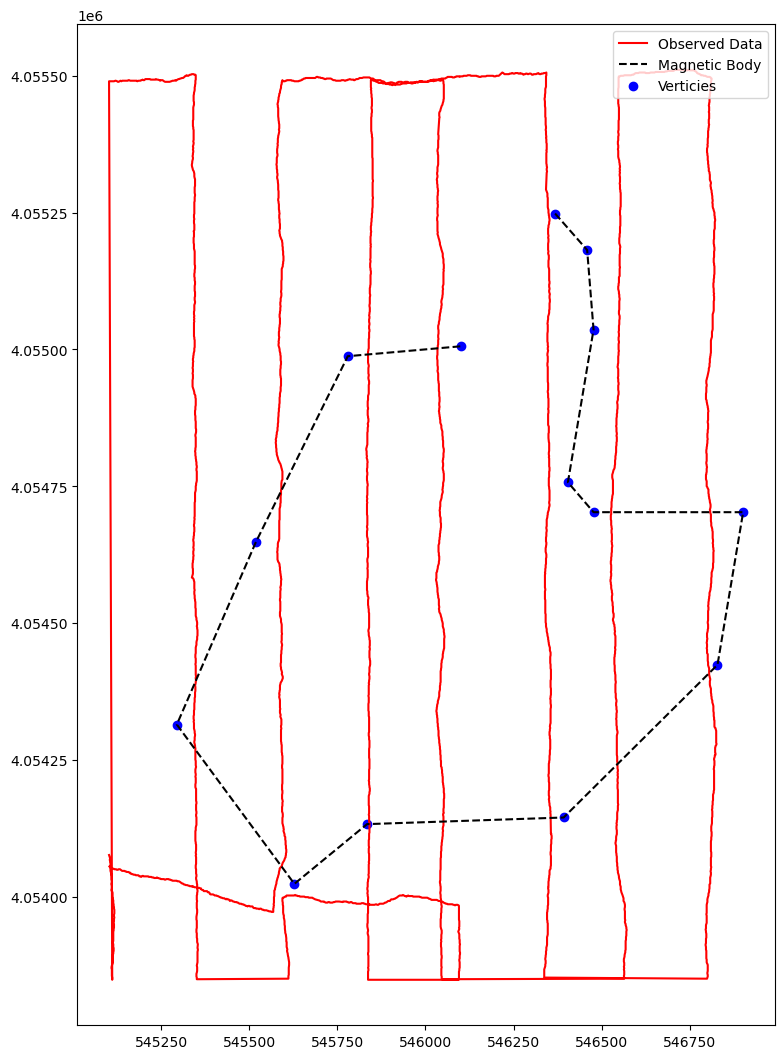

In [6]:
plot_line_and_polygon(shape=shape,points=pts)

In [11]:
all_shapes = []  # List to hold all shape data

#assuming single shape
shape_data = {
    'name': f"shape 1",
    'x': shape.Easting.to_list(),
    'y': shape.Northing.to_list(),
    'magnetic_inclination': -67,
    'magnetic_declination': 177,
    'magnetic_intensity': 1,
    'top': 10,
    'bottom': 50
}

all_shapes.append(shape_data)

# Save all shapes data to JSON
save_json(all_shapes,filename='/home/jovyan/Cproject/data/shape_data/cone1_shape.json')

json saved to: /home/jovyan/Cproject/data/shape_data/cone1_shape.json

